In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [278]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Se puede observar que el dataset posee 891 entradas y 12 columnas en total. Estas son:<br>
1- PassengerId.<br>
2- Survived.<br>
3- Pclass.<br>
4- Name.<br>
5- Sex.<br>
6- Age.<br>
7- SibSp.<br>
8- Parch.<br>
9- Ticket.<br>
10- Fare.<br>
11- Cabin. <br>
12- Embarked.<br>

En algunas columnas se puede apreciar que posee datos faltantes(Nan)/nulos, tanto en edad(age), cabina(cabin) y<br>
embarque(embarked), mas adelante se decidira que hacer con esto valores nulos/faltaste, se modificara algun tipo de dato<br>
segun sea necesario y se trataran los valores duplicados si estos existen.

### Informacion de los valores numericos.

In [279]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### DUPLICADOS

Vemos duplicados por columnas

In [280]:

titanic.duplicated(subset=["PassengerId", "Name"]).sum()

0

Vemos duplicados por fila

In [281]:
filas_duplicadas = titanic.duplicated().sum()
print(f"Hay {filas_duplicadas} filas duplicadas")

Hay 0 filas duplicadas


Se puede observar que hay columnas que poseen datos repetidos o duplicados, eso no quiere decir que haya que trabajarlos<br>
ya que algunos datos se pueden repetir como la edad, si sobrevivio, el sexo. Lo importante es que no se repita un dato<br>
identificador de cada pasajero como es 'PassengerId' ya que cada ID representa un pasajero y en cuanto a las filas tampoco hay valores repetidos.<br>

### VALORES NULOS

In [282]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Se aprecian valores nulos en la columnas 'age','Cabin' y 'Embarked'

Vamos a tratar los valores Nulos de 'Age', ya que de las cabinas no es necesario porque indica el nivel de calidad en la cabina donde estuvieron.

Promedio:  29.69911764705882
Mediana:   28.0


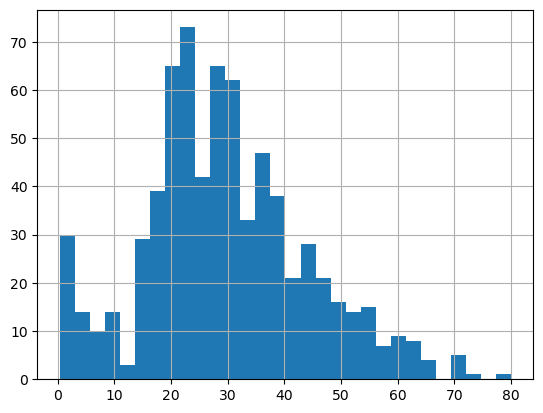

In [283]:
titanic['Age'].hist(bins=30)

print('Promedio: ',titanic['Age'].mean())
print('Mediana:  ',titanic['Age'].median())

Se realizo un grafico tipo histograma para poder ver con que es mejor rellenar los valores nulos, si con el promedio 
o la mediana ya que el promedio se puede ver afectado por valores extremos(outliers) y la mediana no. En este caso da igual cual 
usar porque la distribucion de edades no esta muy sesgada y no posee valores extremos que modifiquen el promedio.

### Reemplazo de nulos en AGE

In [284]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [285]:
titanic['Age'].isna().sum()

0

Edad ya no posee valores nulos.

In [286]:
titanic['Cabin'] = titanic['Cabin'].fillna('Generic')

In [287]:
titanic['Cabin'].isna().sum()

0

Si bien un valor nulo en 'Cabin' tenia un significado, es mejor ponerle un nombre entendible

Los valores nulos de Embarked no se trabajaran de momento.

### CORREGIMOS TIPO DE DATO.
En este caso los tipos de datos estan bien, simplemente cambiamos el tipo de dato de 'Age' a entero para mas comodidad a la hora de trabajarlo.

In [288]:
titanic['Age'] = titanic['Age'].astype('int64')

### NORMALIZACION DE DATOS.
Pasamos los nombres a minuscula para tener mejor comodidad.

In [289]:
titanic['Name']= titanic['Name'].str.lower()

### VALORES ATIPICOS

In [290]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Al observar la tabla resultante de 'titanic.describe()' podemos notar la presencia de valores que estadísticamente son considerados outliers, pero que no son problemáticos para el análisis.

Outliers estadísticos: Son valores que están alejados de la mayoría de los datos según los criterios estadísticos, por ejemplo:

-Edades muy bajas o muy altas (bebés o personas mayores).

-Tarifas de pasaje muy altas (pasajeros de primera clase o tarifas especiales).

Outliers problemáticos: Valores que no tienen sentido real o que pueden ser errores, como:

-Edades negativas o extremadamente elevadas sin justificación.

-Tarifas negativas o valores imposibles.

En este dataset, no se observan outliers problemáticos. Los valores atípicos encontrados son plausibles y forman parte natural de la distribución de los datos. Por lo tanto, no es necesario eliminar ni corregir estos valores para los análisis posteriores.



### ANALISIS EXPLORATORIO

¿Cuántos pasajeros había en total? ¿Cuántos sobrevivieron y cuántos no?

cantidad total de pasajeros 891


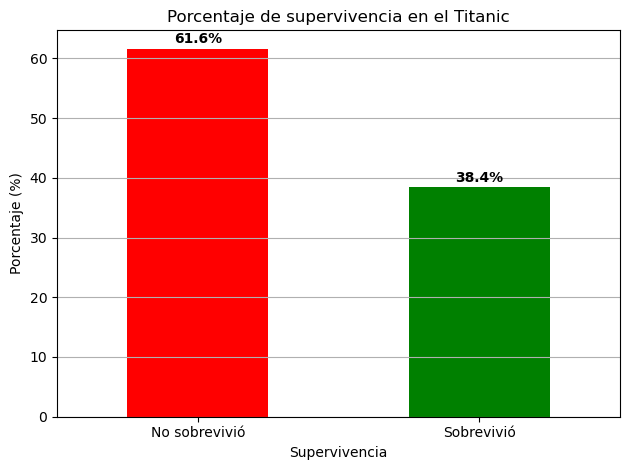

In [291]:
cantidad_pasajeros = titanic['PassengerId'].count()
print("cantidad total de pasajeros", cantidad_pasajeros)
porcentajes = titanic['Survived'].value_counts(normalize=True) * 100
etiquetas = ['No sobrevivió', 'Sobrevivió']

ax = porcentajes.plot.bar(color=['red', 'green'])
ax.set_xticklabels(etiquetas, rotation=0)
plt.title("Porcentaje de supervivencia en el Titanic")
plt.xlabel("Supervivencia")
plt.ylabel("Porcentaje (%)")
plt.grid(axis='y')

for i, valor in enumerate(porcentajes):
    plt.text(i, valor + 1, f'{valor:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Distribucion por sexo.

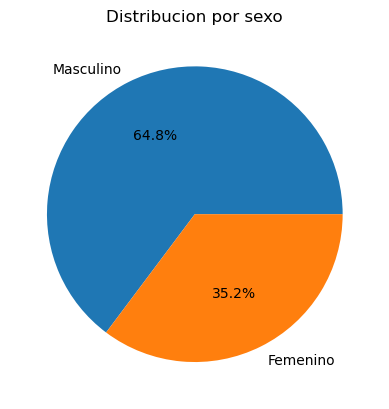

In [292]:
distribucion_sexo = titanic['Sex'].value_counts()
sexos = ['Masculino','Femenino']
plt.pie(distribucion_sexo, labels=sexos, autopct= '%1.1f%%')
plt.title('Distribucion por sexo')
plt.show()

distribución por clase (Pclass)

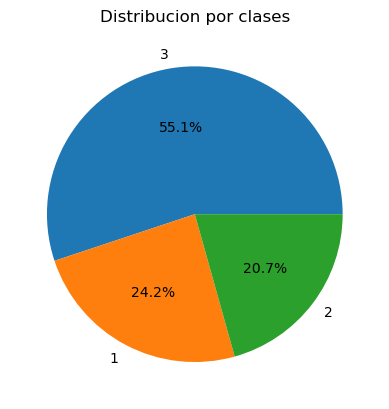

In [293]:
distribucion_clase = titanic['Pclass'].value_counts()
plt.pie(distribucion_clase.values, labels=distribucion_clase.index, autopct= '%1.1f%%')
plt.title('Distribucion por clases')
plt.show()

In [294]:
edad = titanic['Age']
titanic['CatAge'] = pd.cut(edad, bins=[0,3,12,18,60,100],
                                 labels=['Bebe','Niño','Adolescente','Adulto','Anciano'],
                                 right=False)
titanic.groupby('CatAge')['Survived'].value_counts().reset_index()

C:\Users\agust\AppData\Local\Temp\ipykernel_2176\1553607392.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('CatAge')['Survived'].value_counts().reset_index()


,CatAge,Survived,count
0,Bebe,1,15
1,Bebe,0,9
2,Niño,1,24
3,Niño,0,20
4,Adolescente,0,23
5,Adolescente,1,22
6,Adulto,0,478
7,Adulto,1,274
8,Anciano,0,19
9,Anciano,1,7


Distribucion por edad.

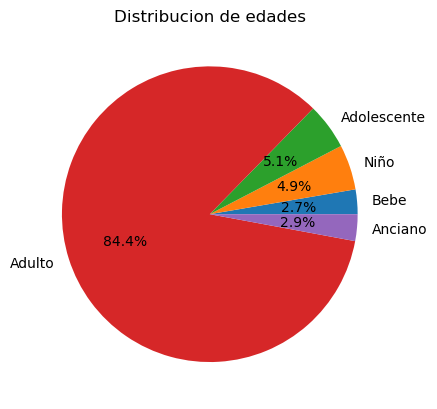

In [295]:

categoria_edad = titanic['CatAge'].value_counts().sort_index()
#para un grafico mas entendible, dividimos los edades en categorias
plt.pie(categoria_edad, labels=categoria_edad.index, autopct= '%1.1f%%')
plt.title('Distribucion de edades')
plt.show()

Edad de pasajes, promedio y mediana.

El promedio de la edad de los pasajeros es 29.34567901234568
La mediana de la edad de los pasajeros es 28.0


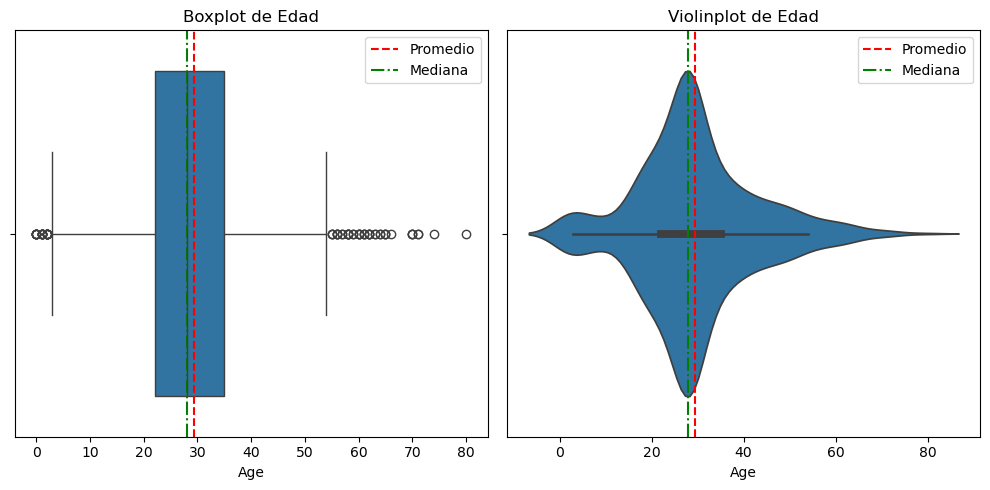

In [296]:
edad_promedio = titanic['Age'].mean()
edad_mediana = titanic['Age'].median()
edades = titanic['Age']
print(f"El promedio de la edad de los pasajeros es {edad_promedio}")
print(f"La mediana de la edad de los pasajeros es {edad_mediana}")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # axs es un array 1D de largo 2

sns.boxplot(x=edades, ax=axs[0])
axs[0].axvline(edad_promedio, color='red', linestyle='--', label='Promedio')
axs[0].axvline(edad_mediana, color='green', linestyle='-.', label='Mediana')
axs[0].set_title('Boxplot de Edad')
axs[0].legend()

sns.violinplot(x=edades, ax=axs[1])
axs[1].axvline(edad_promedio, color='red', linestyle='--', label='Promedio')
axs[1].axvline(edad_mediana, color='green', linestyle='-.', label='Mediana')
axs[1].set_title('Violinplot de Edad')
axs[1].legend()

plt.tight_layout()
plt.show()



¿Cuál es la tarifa promedio que se pagó por el pasaje?

In [297]:
promedio_tarifa = titanic['Fare'].mean()
print(f"el promedio de la tarifa de los pasajes es {promedio_tarifa:.2f}")

el promedio de la tarifa de los pasajes es 32.20


¿Cuál fue el puerto de embarque más común?<br>
Ya que las columnas con la simple letra no indica nada, vamos a crear una nueva columna con el nombre del puerto y otra columna del pais a que pertenece.<br>
Al tratar tambien dos valores nulos en embarked, tambien rellenaremos las columnas con el mismo contenido de embarked.

In [298]:
dicc_puertos = {"C":"Cherbourg","Q":"Queenstown","S":"Southampton"}
dicc_paises_puertos = {"Cherbourg":"France","Queenstown":"Ireland","Southampton":"England"}

titanic["Puertos"] = titanic["Embarked"].map(dicc_puertos)
titanic["Country"] = titanic["Puertos"].map(dicc_paises_puertos)


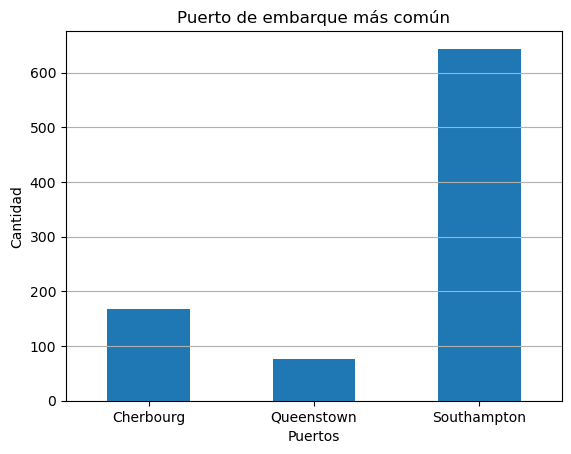

Puerto de embarque más común: Southampton con 644 pasajeros


In [299]:
cant_puertos = titanic.groupby("Puertos").size()

graph = cant_puertos.plot.bar()
graph.set_xticklabels(cant_puertos.index, rotation=0)

plt.title("Puerto de embarque más común")
plt.xlabel("Puertos")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.show()

# Mostrar el puerto más común
print("Puerto de embarque más común:", cant_puertos.idxmax(), "con", cant_puertos.max(), "pasajeros")

¿Cuántos pasajeros viajaban solos y cuántos con familia?

In [300]:
# Filtramos por quien viaja solo y quien viaja acompañado.
viaja_solo = titanic[(titanic['SibSp'] == 0) & (titanic['Parch']==0)].shape[0]
viaja_acompañado = titanic[(titanic['SibSp'] > 0) | (titanic['Parch'] > 0)].shape[0]


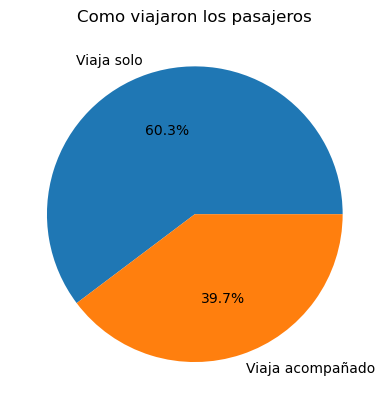

In [301]:
valores = [viaja_solo, viaja_acompañado]
etiquetas = ['Viaja solo','Viaja acompañado']

plt.pie(valores, labels=etiquetas, autopct= '%1.1f%%')
plt.title('Como viajaron los pasajeros')
plt.show()

¿Los pasajeros que pagaron más (Fare) tenían más chances de sobrevivir?

In [302]:
Posibilidades = titanic.groupby('Survived')['Fare'].mean()
print(Posibilidades)

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


<Axes: xlabel='Survived', ylabel='Fare'>

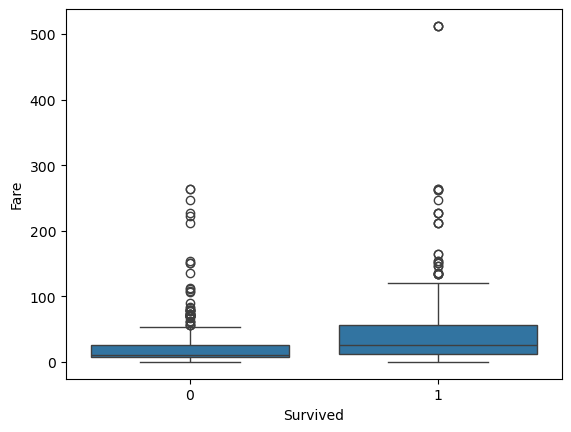

In [303]:
sns.boxplot(x='Survived', y='Fare', data=titanic)

¿Cuántos hombres y cuántas mujeres había a bordo?

In [304]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

¿Cuál fue la tasa de supervivencia por sexo?

In [305]:
titanic.groupby("Sex")['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

Cantidad

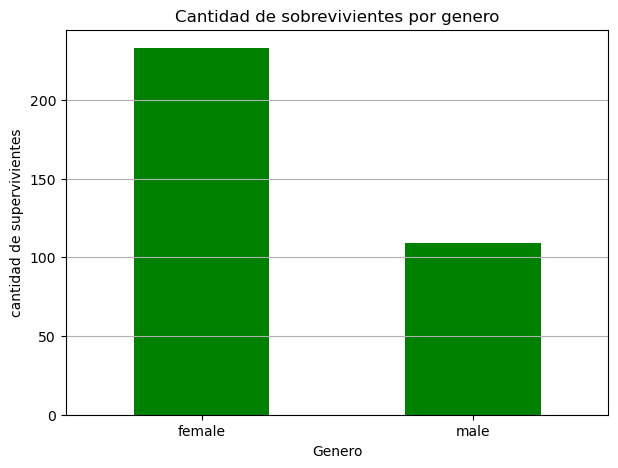

In [306]:
supervivencia_genero = titanic.groupby("Sex")['Survived'].sum() 
plt.figure(figsize=(7, 5))
grafico = supervivencia_genero.plot.bar(color='green')
grafico.set_xticklabels(supervivencia_genero.index, rotation=0)

plt.title("Cantidad de sobrevivientes por genero")
plt.xlabel("Genero")
plt.ylabel("cantidad de supervivientes")


plt.grid(axis='y')
plt.show()


Porcentaje de supervivencia por genero.

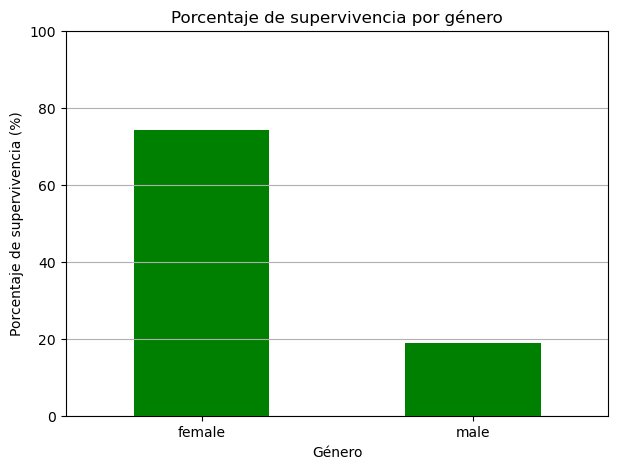

In [307]:
# Conteo total por género
total_por_genero = titanic.groupby('Sex')['Survived'].count()

# Suma de sobrevivientes por género
sobrevivientes_por_genero = titanic.groupby('Sex')['Survived'].sum()

# Calcular porcentaje de supervivencia
porcentaje_supervivencia = (sobrevivientes_por_genero / total_por_genero) * 100

# Gráfico
plt.figure(figsize=(7,5))
ax = porcentaje_supervivencia.plot(kind='bar', color='green')
ax.set_xticklabels(porcentaje_supervivencia.index, rotation=0)

plt.title("Porcentaje de supervivencia por género")
plt.xlabel("Género")
plt.ylabel("Porcentaje de supervivencia (%)")
plt.ylim(0, 100)

plt.grid(axis='y')
plt.show()

Supervivencia por categoria de edad, si era bebe, niño, adolescente, adulto, anciano

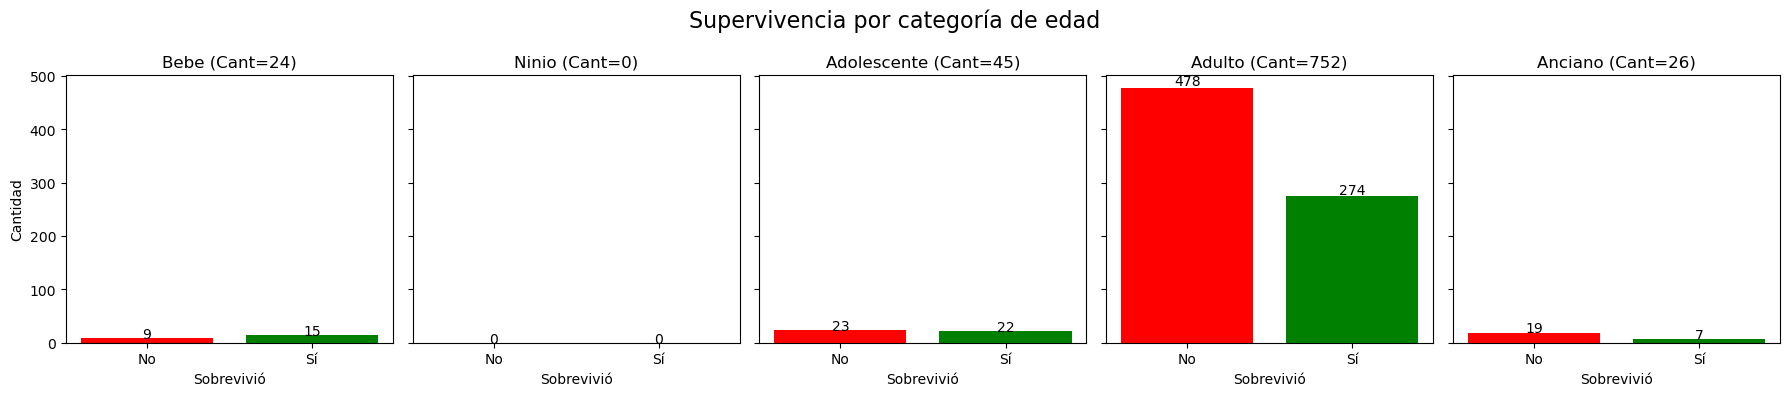

In [308]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4), sharey=True)

categorias = ['Bebe', 'Ninio', 'Adolescente', 'Adulto', 'Anciano']

for i, categoria in enumerate(categorias):
    subset = titanic[titanic['CatAge'] == categoria]
    conteo = subset['Survived'].value_counts().reindex([0, 1], fill_value=0)
    colores = ['green' if idx == 1 else 'red' for idx in conteo.index]

    axes[i].bar(conteo.index, conteo.values, color=colores)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Sí'])
    axes[i].set_title(f'{categoria} (Cant={len(subset)})')
    axes[i].set_xlabel('Sobrevivió')

    if i == 0:
        axes[i].set_ylabel('Cantidad')

    for idx, valor in enumerate(conteo.values):
        axes[i].text(idx, valor + max(conteo.values)*0.01, str(valor), ha='center')

fig.suptitle('Supervivencia por categoría de edad', fontsize=16)
plt.tight_layout()
plt.show()


¿Cómo varió la tasa de supervivencia entre mujeres menores de 18 años y mayores de 18?

In [309]:
titanic[(titanic['Sex'] == 'female') & (titanic['Age'] > 18)].groupby('Survived').size()

Survived
0     59
1    187
dtype: int64

In [310]:
titanic[(titanic['Sex'] == 'female') & (titanic['Age'] < 18)].groupby('Survived').size()

Survived
0    17
1    38
dtype: int64

In [311]:
mayores = titanic[(titanic['Sex'] == 'female') & (titanic['Age'] > 18 )]
tasa_mayores = mayores['Survived'].mean()

menores = titanic[(titanic['Sex'] == 'female') & (titanic['Age'] < 18 )]
tasa_menores = menores['Survived'].mean()

print(f"La tasa de supervivencia de las mujeres mayores a 18 es {tasa_mayores:.2%}")
print(f"La tasa de supervivencia de las mujeres menores a 18 es {tasa_menores:.2%}")

La tasa de supervivencia de las mujeres mayores a 18 es 76.02%
La tasa de supervivencia de las mujeres menores a 18 es 69.09%


In [312]:
titanic[(titanic['Sex'] == 'male') & (titanic['Age'] > 18)].groupby('Survived').size()

Survived
0    421
1     85
dtype: int64

In [313]:
titanic[(titanic['Sex'] == 'male') & (titanic['Age'] < 18)].groupby('Survived').size()

Survived
0    35
1    23
dtype: int64

In [314]:
mayores_h = titanic[(titanic['Sex'] == 'male') & (titanic['Age'] > 18 )]
tasa_mayores_h = mayores_h['Survived'].mean()

menores_h = titanic[(titanic['Sex'] == 'male') & (titanic['Age'] < 18 )]
tasa_menores_h = menores_h['Survived'].mean()

print(f"La tasa de supervivencia de las hombres mayores a 18 es {tasa_mayores_h:.2%}")
print(f"La tasa de supervivencia de las hombres menores a 18 es {tasa_menores_h:.2%}")

La tasa de supervivencia de las hombres mayores a 18 es 16.80%
La tasa de supervivencia de las hombres menores a 18 es 39.66%


¿Qué combinación de sexo y clase social tuvo la mayor tasa de supervivencia?

In [315]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack().round(2)*100

Pclass,1,2,3
Sex,,,
female,97.0,92.0,50.0
male,37.0,16.0,14.0


¿Cuál fue la edad promedio de los fallecidos por sexo y clase?

In [316]:
fallecidos = titanic[titanic['Survived'] == 0].groupby(['Sex','Pclass'])['Age'].mean().round(2).reset_index()
fallecidos

,Sex,Pclass,Age
0,female,1,25.67
1,female,2,36.00
2,female,3,24.79
3,male,1,41.13
4,male,2,32.95
5,male,3,27.45


C:\Users\agust\AppData\Local\Temp\ipykernel_2176\2833627321.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico_promedio_fallecidos.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)


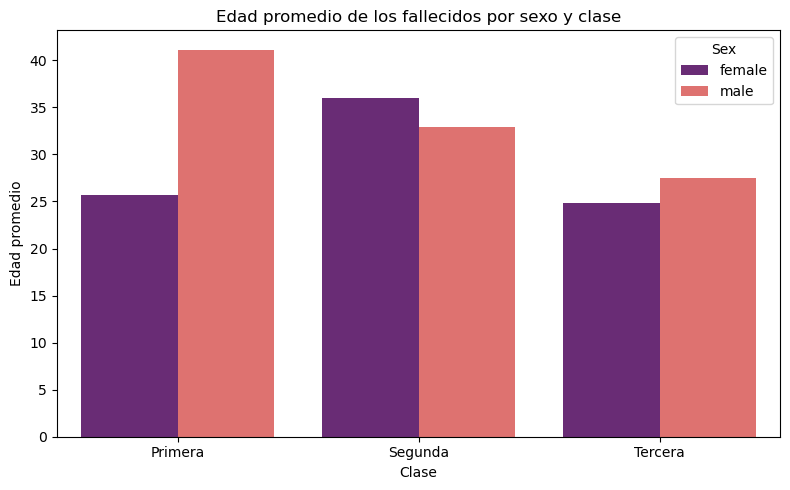

In [317]:
plt.figure(figsize=(8,5))
grafico_promedio_fallecidos = sns.barplot(data=fallecidos, x='Pclass', y='Age', hue='Sex', palette='magma')
grafico_promedio_fallecidos.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)
plt.title('Edad promedio de los fallecidos por sexo y clase')
plt.xlabel('Clase')
plt.ylabel('Edad promedio')
plt.tight_layout()
plt.show()

¿Cuál fue la tasa de supervivencia por clase (Pclass)?

In [318]:
titanic.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

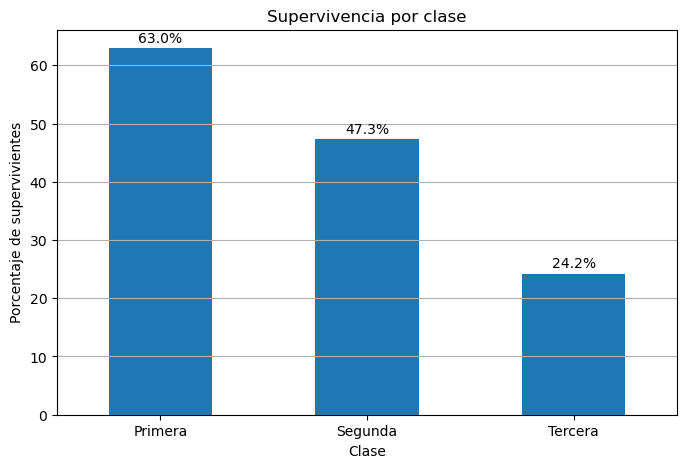

In [319]:
supervivencia_clase= titanic.groupby('Pclass')['Survived'].mean() *100
plt.figure(figsize=(8,5))
grafico2 = supervivencia_clase.plot.bar()
grafico2.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)
for index,value in enumerate(supervivencia_clase):
    plt.text(index, value+ 1 , f"{value:.1f}%", ha='center',fontsize=10 )

plt.title("Supervivencia por clase")
plt.xlabel("Clase")
plt.ylabel("Porcentaje de supervivientes")
plt.grid(axis='y')
plt.show()

¿Existen diferencias significativas en la edad promedio de los sobrevivientes según la clase social?

In [320]:
titanic[titanic['Survived'] == 1].groupby('Pclass')['Age'].mean()
#no entre 2 y 3 clase pero si en la 1ra clase

Pclass
1    34.602941
2    25.965517
3    22.731092
Name: Age, dtype: float64

C:\Users\agust\AppData\Local\Temp\ipykernel_2176\4020633115.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico3.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)


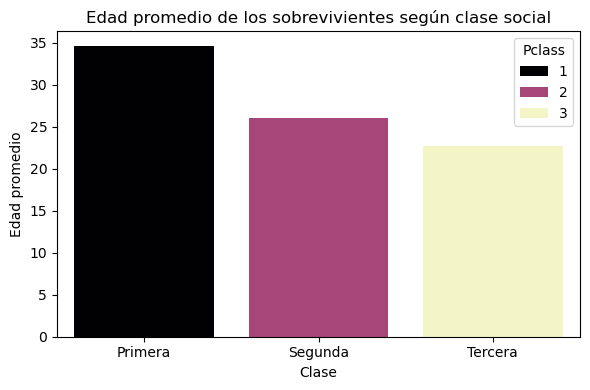

In [321]:
edad_prom = titanic[titanic['Survived'] == 1].groupby('Pclass')['Age'].mean().reset_index()

# Gráfico
plt.figure(figsize=(6,4))
grafico3 = sns.barplot(data=edad_prom, x='Pclass', y='Age',hue='Pclass', palette='magma')
grafico3.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)
plt.title('Edad promedio de los sobrevivientes según clase social')
plt.xlabel('Clase')
plt.ylabel('Edad promedio')
plt.tight_layout()
plt.show()

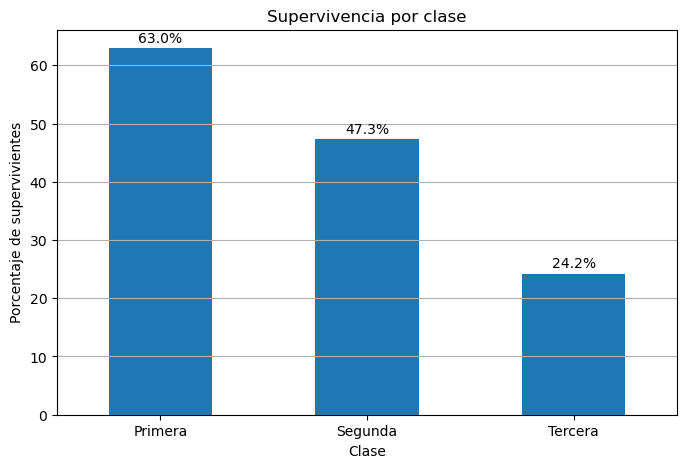

In [322]:
supervivencia_clase= titanic.groupby('Pclass')['Survived'].mean() *100
plt.figure(figsize=(8,5))
grafico2 = supervivencia_clase.plot.bar()
grafico2.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)
for index,value in enumerate(supervivencia_clase):
    plt.text(index, value+ 1 , f"{value:.1f}%", ha='center',fontsize=10 )

plt.title("Supervivencia por clase")
plt.xlabel("Clase")
plt.ylabel("Porcentaje de supervivientes")
plt.grid(axis='y')
plt.show()

In [323]:
clase_1 = titanic[titanic['Pclass'] == 1]['Age']
clase_2 = titanic[titanic['Pclass'] == 2]['Age']
clase_3 = titanic[titanic['Pclass'] == 3]['Age']
print(clase_1.std()) 
print(clase_2.std()) 
print(clase_3.std()) 

14.19168333810307
13.606289642761466
10.69545080978074


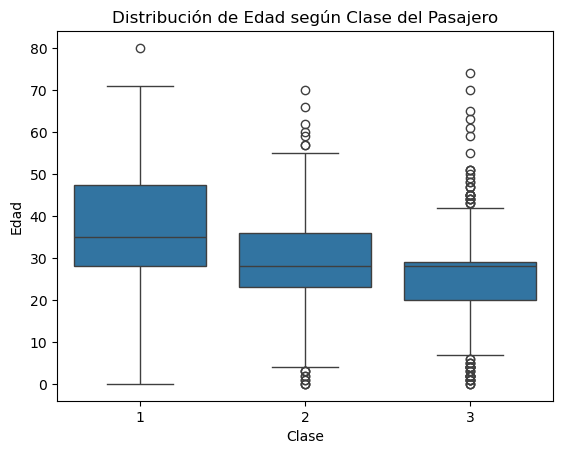

In [324]:
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Distribución de Edad según Clase del Pasajero')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

¿Hay relación entre el tamaño de la familia (SibSp + Parch) y la supervivencia?

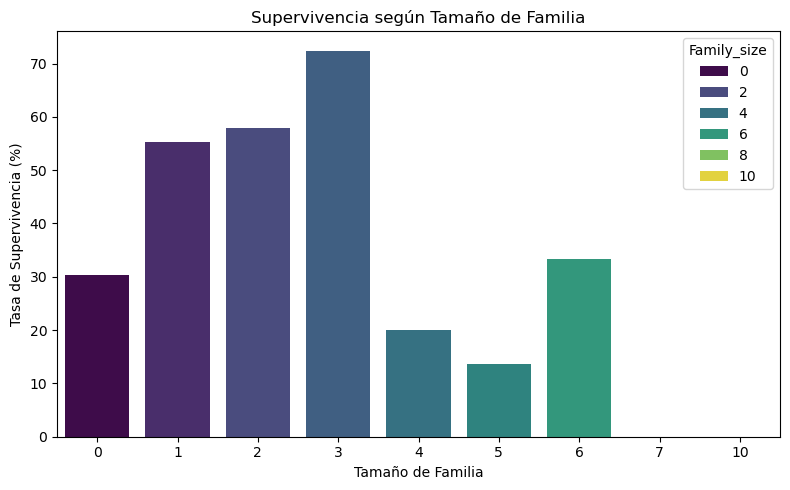

In [325]:
#vamos a crear una columna con la suma de ambas columas de familiares y pareja para que sea mas legiblea la hora de agrupar.

titanic['Family_size'] = titanic['SibSp'] + titanic['Parch']
family_survived = titanic.groupby('Family_size')['Survived'].mean().reset_index() 
family_survived['Survived'] = family_survived['Survived']  * 100


plt.figure(figsize=(8,5))
sns.barplot(data=family_survived, x='Family_size', y='Survived',hue='Family_size', palette='viridis')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xlabel('Tamaño de Familia')
plt.title('Supervivencia según Tamaño de Familia')
plt.tight_layout()
plt.show()

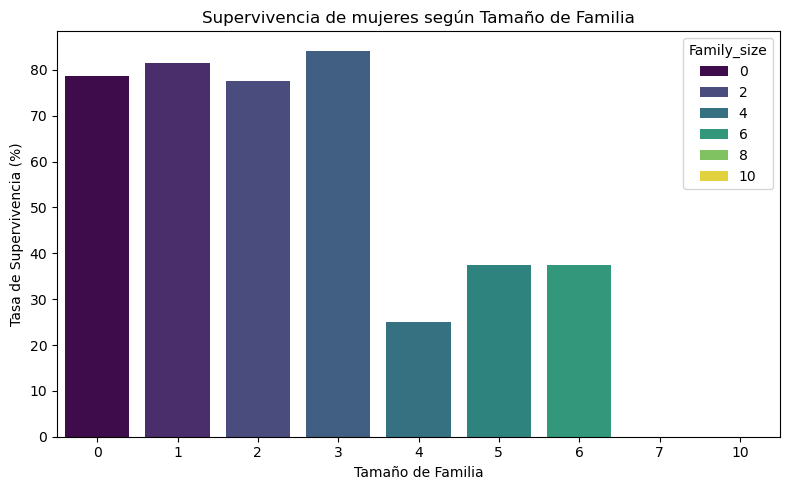

In [326]:
#vamos a crear una columna con la suma de ambas columas de familiares y pareja para que sea mas legiblea la hora de agrupar.

family_survived = titanic[titanic['Sex'] == 'female' ].groupby('Family_size')['Survived'].mean().reset_index() 
family_survived['Survived'] = family_survived['Survived']  * 100


plt.figure(figsize=(8,5))
sns.barplot(data=family_survived, x='Family_size', y='Survived',hue='Family_size', palette='viridis')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xlabel('Tamaño de Familia')
plt.title('Supervivencia de mujeres según Tamaño de Familia')
plt.tight_layout()
plt.show()

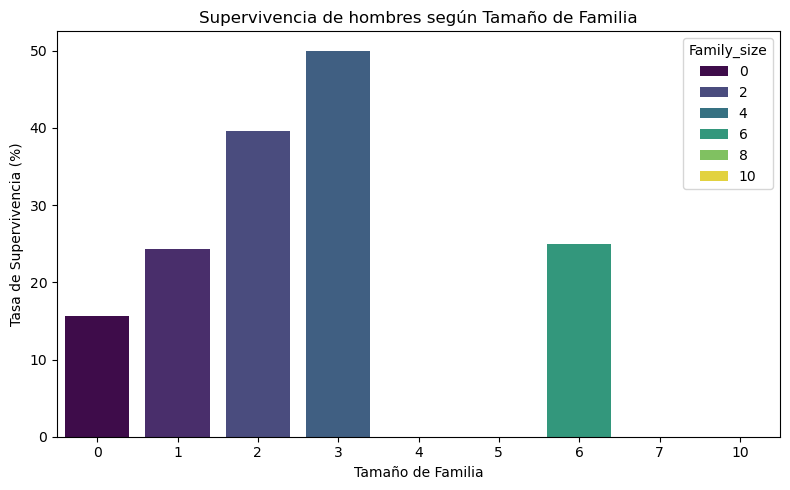

In [327]:
family_survived = titanic[titanic['Sex'] == 'male' ].groupby('Family_size')['Survived'].mean().reset_index() 
family_survived['Survived'] = family_survived['Survived']  * 100


plt.figure(figsize=(8,5))
sns.barplot(data=family_survived, x='Family_size', y='Survived',hue='Family_size', palette='viridis')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xlabel('Tamaño de Familia')
plt.title('Supervivencia de hombres según Tamaño de Familia')
plt.tight_layout()
plt.show()

¿Los pasajeros que pagaron más (Fare) tenían más chances de sobrevivir?

In [328]:
titanic.groupby(['Survived','Pclass'])['Fare'].mean().reset_index()

,Survived,Pclass,Fare
0,0,1,64.684007
1,0,2,19.412328
2,0,3,13.669364
3,1,1,95.608029
4,1,2,22.055700
5,1,3,13.694887


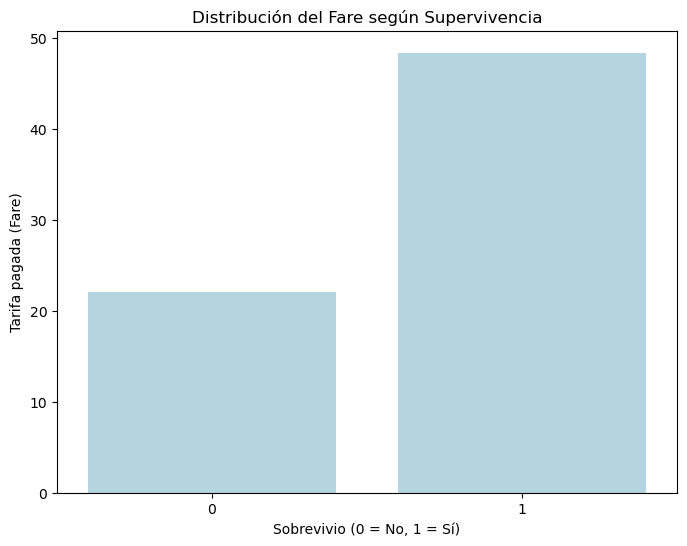

In [329]:
plt.figure(figsize=(8,6))
sns.barplot(data=titanic, x='Survived', y='Fare', color='lightblue', errorbar=None)  # o ci=None
plt.xlabel('Sobrevivio (0 = No, 1 = Sí)')
plt.ylabel('Tarifa pagada (Fare)')
plt.title('Distribución del Fare según Supervivencia')
plt.show()